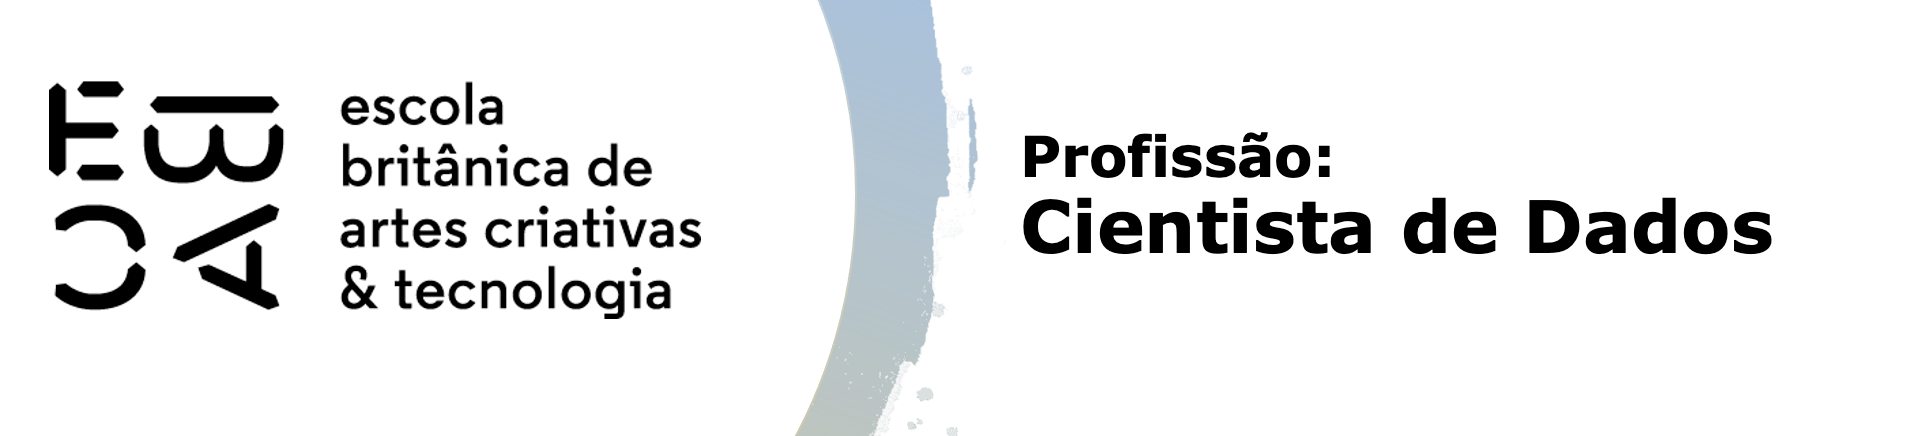

___________

### Aluno: Victor Resende

___________

# Tarefa

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene
from scipy.stats import t

In [15]:
pg = sns.load_dataset('penguins')

In [17]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

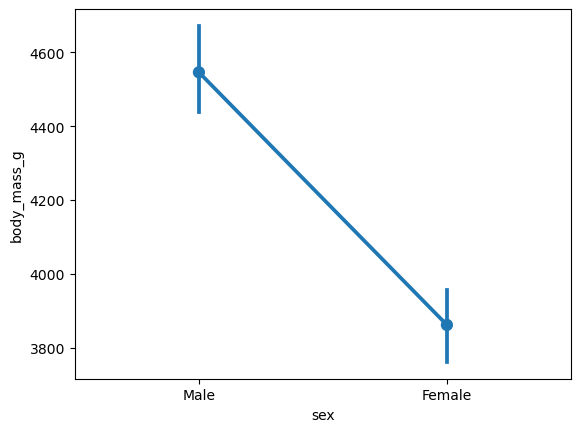

In [19]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [22]:
# Removendo valores ausentes:
pg_clean = pg.dropna(subset=['sex', 'body_mass_g'])

# Dividindo os dados por sexo:
male_weights = pg_clean[pg_clean['sex'] == 'Male']['body_mass_g']
female_weights = pg_clean[pg_clean['sex'] == 'Female']['body_mass_g']

# Teste de igualdade de variâncias (Levene):
levene_stat, levene_p = levene(male_weights, female_weights)

# Teste t para amostras independentes:
equal_var = levene_p > 0.05  # Assume igualdade de variâncias se p > 0.05
t_stat, p_value = ttest_ind(male_weights, female_weights, equal_var=equal_var)

levene_stat, levene_p, t_stat, p_value


(6.058617438712248,
 0.014348206700435228,
 8.554537231165762,
 4.793891255051457e-16)

Se observarmos o p_value, < 0,05, altamente significativo, entendemos que há evidências de que os pesos médios de machos e fêmeas são diferentes na população total.

## 2) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

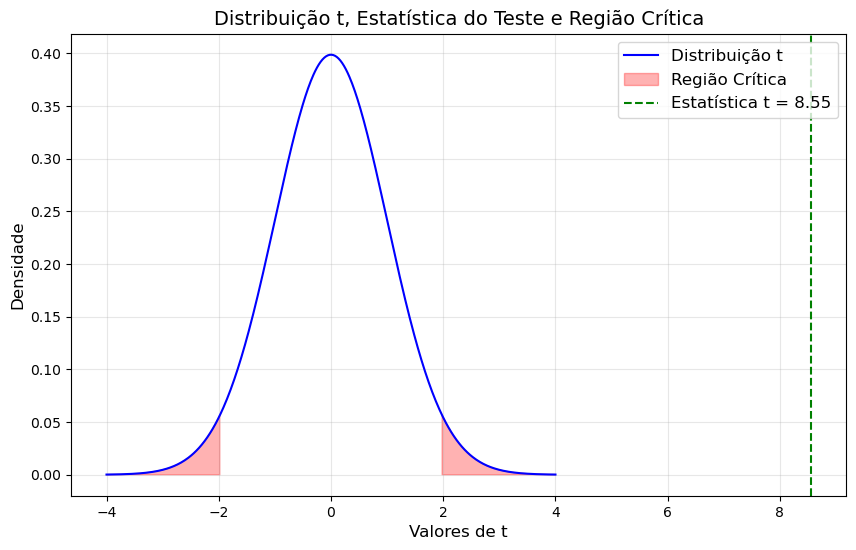

In [30]:
# Parâmetros do teste t:
df = len(male_weights) + len(female_weights) - 2  # Graus de liberdade
t_crit = t.ppf(0.975, df)  # Valor crítico para 95% de confiança (bicaudal)

# Valores da distribuição t:
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Plotando a distribuição t:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição t", color="blue")

# Adicionando as regiões críticas:
plt.fill_between(x, 0, y, where=(x <= -t_crit) | (x >= t_crit), color="red", alpha=0.3, label="Região Crítica")

# Adicionando a estatística t calculada:
plt.axvline(t_stat, color="green", linestyle="--", label=f"Estatística t = {t_stat:.2f}")

# Títulos e legendas:
plt.title("Distribuição t, Estatística do Teste e Região Crítica", fontsize=14)
plt.xlabel("Valores de t", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [33]:
# Lista para armazenar os resultados
results = []

# Iterando sobre cada espécie única:
for species in pg_clean['species'].unique():
    # Filtrando os dados para a espécie atual:
    species_data = pg_clean[pg_clean['species'] == species]
    male_weights_species = species_data[species_data['sex'] == 'Male']['body_mass_g']
    female_weights_species = species_data[species_data['sex'] == 'Female']['body_mass_g']
    
    # Teste de Levene para igualdade de variâncias:
    levene_stat, levene_p = levene(male_weights_species, female_weights_species)
    equal_var = levene_p > 0.05  # Igualdade de variâncias
    
    # Teste t para amostras independentes:
    t_stat, p_value = ttest_ind(male_weights_species, female_weights_species, equal_var=equal_var)
    
    # Armazenando os resultados:
    results.append({'species': species, 'p_value': p_value})

# Convertendo resultados para um DataFrame:
results_df = pd.DataFrame(results)
print(results_df)


     species       p_value
0     Adelie  2.220644e-26
1  Chinstrap  2.043956e-06
2     Gentoo  2.133688e-28


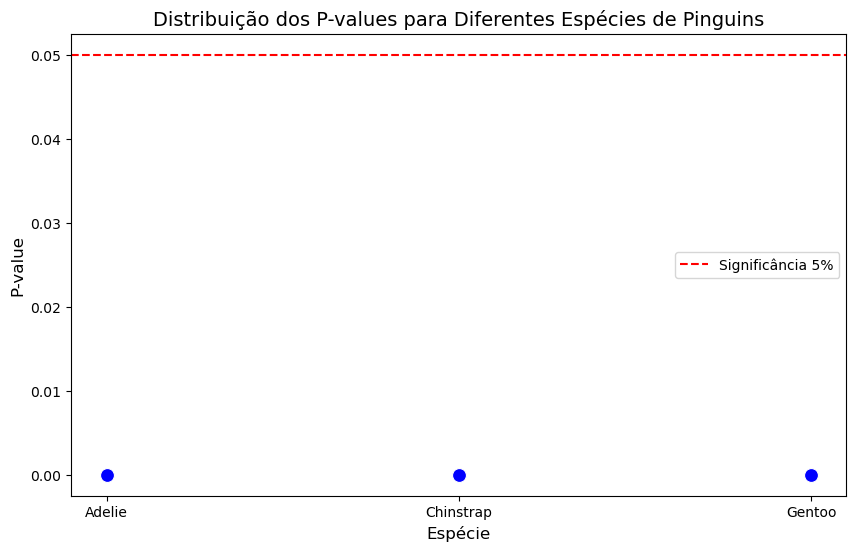

In [41]:
# Plotando gráfico de dispersão:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='species', y='p_value', data=results_df, s=100, color='blue', marker='o')

# Linha de referência para p-value = 0.05:
plt.axhline(y=0.05, color='r', linestyle='--', label="Significância 5%")

# Títulos e legendas:
plt.title('Distribuição dos P-values para Diferentes Espécies de Pinguins', fontsize=14)
plt.xlabel('Espécie', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.legend()
plt.show()


Observando, novamente, os p_values < 0.05, entendemos que há evidências de que os pesos médios de machos e fêmeas são diferentes na população total.

____________